In [1]:
import pickle

import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from matplotlib import pyplot as plt

model = load_model('../models/sentiment-analysis-model/finalsentimentmodel.h5')
with open('../models/sentiment-analysis-model/finalwordindex.pkl', 'rb') as picklefile:
    word_index = pickle.load(picklefile)
top_words = len(word_index)
tokenizer = Tokenizer(num_words=top_words)
tokenizer.word_index = word_index

In [2]:
def get_sentiment_analysis(party):
    df = pd.read_csv(f'../data/sejm-speeches-sored-balanced/{party}.csv')
    df["Positive"] = np.nan
    df["Negative"] = np.nan

    for idx, row in df.iterrows():
        text = [row["Speech"]]
        test_sequences = tokenizer.texts_to_sequences(text)
        x_test = pad_sequences(test_sequences, maxlen=40)
        result = model.predict(x_test)
        row["Positive"] = result[:, 1] * 100
        row["Negative"] = result[:, 2] * 100
        df.loc[idx] = row
    return df

In [7]:
parties_data = []
for party in ["konfederacja","pis",'po']:
    parties_data.append(get_sentiment_analysis(party))

1/1 [==============================] - 0s 30ms/step


In [8]:
def get_pie_chart(df,party):
    labels = ["Positive","Negative"]
    biases = [df["Positive"].mean().tolist(), df["Negative"].mean().tolist()]
    colors = ['#99ff99', '#ff9999']

    fig1, ax1 = plt.subplots()
    ax1.pie(biases, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
    plt.title(str(party))
    plt.show()

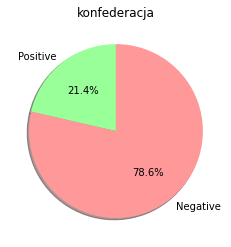

In [9]:
parties=['konfederacja','po','pis']

for idx,party in enumerate(parties_data):
    get_pie_chart(party,parties[idx])